In [21]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as mt
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
data=pd.read_csv('./dataset/preprocessed.csv')
data.head()

,gender,has_children,direction_same,income,education,age,time,expiration,Bar,CoffeeHouse,...,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,Y
0,0,1,0,3,2,1,2,1,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
1,0,1,0,3,2,1,1,0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,3,2,1,1,0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
3,0,1,0,3,2,1,2,0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,3,2,1,2,1,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12599 entries, 0 to 12598
Data columns (total 60 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   gender                                                12599 non-null  int64  
 1   has_children                                          12599 non-null  int64  
 2   direction_same                                        12599 non-null  int64  
 3   income                                                12599 non-null  int64  
 4   education                                             12599 non-null  int64  
 5   age                                                   12599 non-null  int64  
 6   time                                                  12599 non-null  int64  
 7   expiration                                            12599 non-null  int64  
 8   Bar                                                   12

In [24]:
data.columns

Index(['gender', 'has_children', 'direction_same', 'income', 'education',
       'age', 'time', 'expiration', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon',
       'destination_Home', 'destination_No Urgent Place', 'destination_Work',
       'passenger_Alone', 'passenger_Friend(s)', 'passenger_Kid(s)',
       'passenger_Partner', 'weather_Rainy', 'weather_Snowy', 'weather_Sunny',
       'coupon_Bar', 'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)',
       'maritalStatus_Divorced', 'maritalStatus_Married partner',
       'maritalStatus_Single', 'maritalStatus_Unmarried partner',
       'maritalStatus_Widowed', 'occupation_Architecture & Engineering',
       'occupation_Arts Design Entertainment Sports & Media',
       'occupation_Building & Grounds Cleaning & Maintenance',
       'occupation_Business & Financial',
       'occupation_Community & Social Services',
       '

In [25]:
data.describe()

,gender,has_children,direction_same,income,education,age,time,expiration,Bar,CoffeeHouse,...,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,Y
count,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12492.000000,12382.000000,...,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000
mean,0.487182,0.414557,0.215414,3.732518,3.126597,3.251766,1.897928,0.557505,1.038104,1.575109,...,0.050639,0.013890,0.008572,0.013811,0.039130,0.086356,0.124931,0.017303,0.147313,0.567426
std,0.499855,0.492665,0.411126,2.542332,1.263915,2.134310,1.431029,0.496702,1.096784,1.242298,...,0.219268,0.117039,0.092192,0.116709,0.193912,0.280900,0.330653,0.130403,0.354432,0.495453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,6.000000,4.000000,5.000000,3.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,8.000000,5.000000,7.000000,4.000000,1.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
data.corr()

,gender,has_children,direction_same,income,education,age,time,expiration,Bar,CoffeeHouse,...,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,Y
gender,1.000000,-0.162954,-0.004716,0.102239,-0.005912,-0.100917,-0.004604,0.001930,0.164333,-0.043718,...,-0.097642,-0.027485,0.059228,0.034330,0.014593,0.057633,0.091815,0.055767,-0.138539,0.043956
has_children,-0.162954,1.000000,-0.032569,0.091263,0.077988,0.441769,0.024896,-0.014872,-0.208218,0.026908,...,-0.049590,0.081844,-0.003097,-0.009847,0.115180,-0.047055,-0.222447,0.048961,-0.013373,-0.045419
direction_same,-0.004716,-0.032569,1.000000,-0.025445,-0.003297,-0.030965,-0.017671,-0.031123,-0.006008,-0.005685,...,0.005782,-0.001151,0.024577,-0.004106,-0.007168,0.003182,0.026824,-0.004383,0.020805,0.015200
income,0.102239,0.091263,-0.025445,1.000000,0.294548,0.084400,0.008488,-0.019562,0.050606,-0.013969,...,-0.063415,0.024225,-0.063708,0.029573,-0.001309,-0.063576,-0.117370,-0.001841,-0.080740,-0.027588
education,-0.005912,0.077988,-0.003297,0.294548,1.000000,0.154555,0.009646,-0.016465,0.049578,0.107128,...,-0.079845,-0.012425,-0.068580,-0.047369,0.051362,-0.033254,-0.144402,-0.066268,-0.114815,-0.054132
age,-0.100917,0.441769,-0.030965,0.084400,0.154555,1.000000,0.004100,-0.020696,-0.157495,-0.051822,...,0.025675,0.110564,0.068907,0.020456,0.314136,-0.000387,-0.396179,0.076182,-0.081771,-0.058992
time,-0.004604,0.024896,-0.017671,0.008488,0.009646,0.004100,1.000000,-0.026026,-0.015059,-0.000707,...,0.000790,0.003252,0.009039,-0.010570,-0.012780,0.001393,-0.006935,-0.000318,0.020102,0.017321
expiration,0.001930,-0.014872,-0.031123,-0.019562,-0.016465,-0.020696,-0.026026,1.000000,-0.009916,-0.002547,...,0.025737,-0.003500,0.016970,-0.008224,-0.007293,-0.002597,0.015702,0.000569,0.008238,0.128505
Bar,0.164333,-0.208218,-0.006008,0.050606,0.049578,-0.157495,-0.015059,-0.009916,1.000000,0.256448,...,0.093395,-0.003520,0.065347,0.050677,-0.134879,-0.011767,-0.023529,0.008748,-0.048205,0.070679
CoffeeHouse,-0.043718,0.026908,-0.005685,-0.013969,0.107128,-0.051822,-0.000707,-0.002547,0.256448,1.000000,...,-0.062028,0.000005,-0.011964,-0.032073,-0.086627,-0.050422,0.122720,-0.008589,-0.031136,0.114568


<AxesSubplot:>

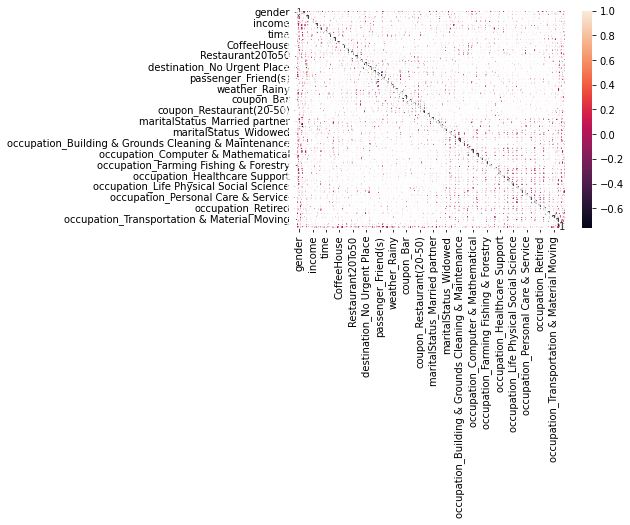

In [27]:
sns.heatmap(data.corr(), annot=True)

In [28]:
target=data['Y']
df=data.copy()
df=df.drop('Y', axis=1)
df.shape

(12599, 59)

In [65]:
X=data.iloc[:, [0,1,2,3,4,5,6,7]].values
le=LabelEncoder()
data['Y']=le.fit_transform(data['Y'])
y=data['Y'].values
data.shape

(12599, 60)

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
print("Trainging split:",X_train.shape)
print("Testing split:",X_test.shape)

Trainging split: (11339, 8)
Testing split: (1260, 8)


In [67]:
dtree=GradientBoostingClassifier()
dtree.fit(X_train,y_train)
print("Gradient Boosting Classifier created!")

Gradient Boosting Classifier created!


In [68]:
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.63      0.37      0.46       540
           1       0.64      0.83      0.72       720

    accuracy                           0.63      1260
   macro avg       0.63      0.60      0.59      1260
weighted avg       0.63      0.63      0.61      1260



In [69]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 0.6349206349206349
